# Day 1

#### These notes may be a little disorganized using as a place to remember and orginize later

# ordinary differential equations (ODE)

An equation that describes how a function changes with respect to one variable, typically time. It expresses the relationship between a function and its derivative, defining how a system evolves over time.

### Trajectory is a solution to an ODE

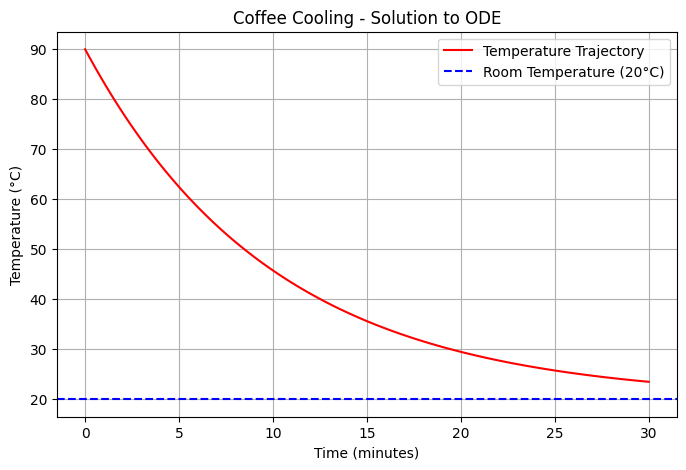

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
T_room = 20  # Room temperature (°C)
x0 = 90      # Initial coffee temperature (°C)
beta = 0.1   # Cooling rate

# Time range (in minutes)
t = np.linspace(0, 30, 100)  # 0 to 30 minutes

# Compute temperature over time using the ODE solution
x_t = T_room + (x0 - T_room) * np.exp(-beta * t)

# Plot the trajectory
plt.figure(figsize=(8,5))
plt.plot(t, x_t, label="Temperature Trajectory", color="red")
plt.axhline(y=T_room, color="blue", linestyle="--", label="Room Temperature (20°C)")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Coffee Cooling - Solution to ODE")
plt.legend()
plt.grid()
plt.show()

# Summary of Key Concepts

| Concept        | Coffee Cooling Example                              | Diffusion Model Equivalent  |
|---------------|-------------------------------------------------|-----------------------------|
| **ODE**       | $ \frac{dx}{dt} = -\beta (x - T_{\text{room}}) $ governs how coffee cools | ODE governs how data transforms |
| **Solution**  | $ x(t) = 20 + 70 e^{-0.1t} $ describes temperature at any time | Defines how noise is added or removed |
| **Trajectory** | The red curve showing how coffee cools over time | Data evolving through noise |
| **Exponential Decay** | $ e^{-0.1t} $ causes the temperature to drop | Noise follows similar decay |


### Every ODE is defined by a Vector field (u)

example:

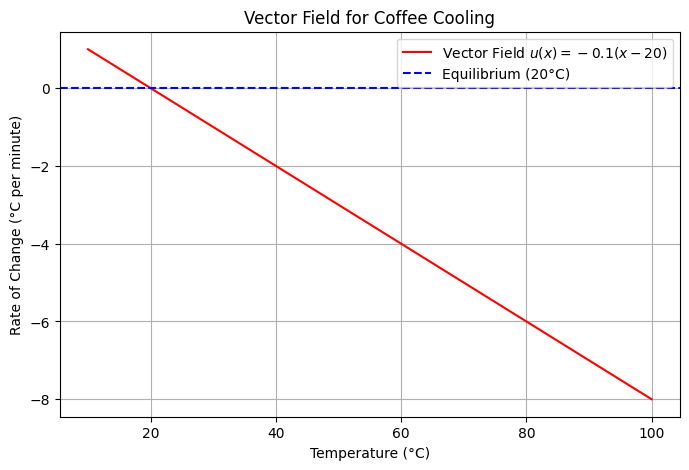

In [2]:
# Define temperature range
x = np.linspace(10, 100, 100)  # Temperature from 10°C to 100°C
beta = 0.1
T_room = 20

# Compute vector field values
u_x = -beta * (x - T_room)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, u_x, label=r"Vector Field $u(x) = -0.1(x - 20)$", color="red")
plt.axhline(y=0, color="blue", linestyle="--", label="Equilibrium (20°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rate of Change (°C per minute)")
plt.title("Vector Field for Coffee Cooling")
plt.legend()
plt.grid()
plt.show()

The vector field u(x) tells us how fast the system changes at every state.

The trajectory is the actual path followed over time.

In diffusion models, vector fields guide how noise is added and removed to transform data.

#### Function flow describes how a system evolves over time when following a vector field. Given an initial condition x0, the function flow defines a mapping that tells us where x(t) moves as time progresses.

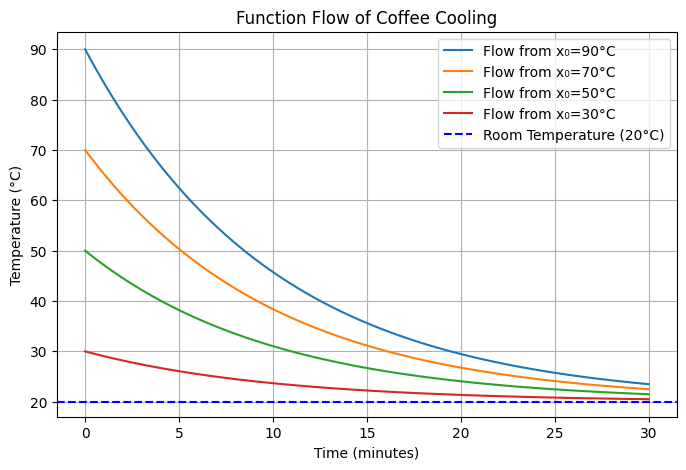

In [3]:
# Given values
beta = 0.1
T_room = 20
times = np.linspace(0, 30, 100)  # Time from 0 to 30 minutes
initial_temps = [90, 70, 50, 30]  # Different starting temperatures

# Plot function flow for each initial temperature
plt.figure(figsize=(8,5))
for x0 in initial_temps:
    x_t = T_room + (x0 - T_room) * np.exp(-beta * times)
    plt.plot(times, x_t, label=f"Flow from x₀={x0}°C")

# Labels and legend
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Function Flow of Coffee Cooling")
plt.axhline(y=T_room, color="blue", linestyle="--", label="Room Temperature (20°C)")
plt.legend()
plt.grid()
plt.show()

# Step 2: Function Flow Table

Using the function flow equation:

$$
\phi_t(x_0) = 20 + (x_0 - 20)e^{-0.1t}
$$

For an initial temperature of \( x_0 = 90 \), we compute the values:

$$
\begin{array}{|c|c|}
\hline
\text{Time } t \text{ (min)} & \text{Coffee Temperature } \phi_t(90) \\
\hline
t = 0  & 90  \\
t = 5  & 20 + 70 e^{-0.5} \approx 57.4  \\
t = 10 & 20 + 70 e^{-1} \approx 45.8  \\
t = 20 & 20 + 70 e^{-2} \approx 30.6  \\
t = 30 & 20 + 70 e^{-3} \approx 24.6  \\
\hline
\end{array}
$$

- The function flow shows how the coffee **cools over time**.
- This corresponds to how diffusion models **transition data into noise**.



# diffeomorphism

A function flow like coffee cooling is a diffeomorphism because it's a smooth, invertible transformation.

In diffusion models, we use diffeomorphic mappings to transition between data and noise.

The inverse process in diffusion models (denoising) follows the same principle as reversing a diffeomorphic transformation.

# Euler Method for Population Growth and Exact Solution

### Problem: 
We are solving the population growth model where the rate of change is proportional to the population. The differential equation is given by:

$$
\frac{dP}{dt} = rP
$$

Where:
- \( P(t) \) is the population at time \( t \),
- \( r = 0.1 \) is the growth rate,
- \( P(0) = 100 \) is the initial population.

We'll compare the **Euler method** and the **exact solution** for population growth over the time interval \( t_0 = 0 \) to \( t_4 = 4 \).

### Euler Method:
The Euler method approximates the population at each step using the formula:

$$
P_{n+1} = P_n + h \cdot r \cdot P_n
$$

Where \( h = 1 \) is the time step.

Starting with \( P_0 = 100 \), we calculate the population from \( t_0 \) to \( t_4 \) with time steps of 1 unit.

#### Step-by-Step Euler Method Calculation:

At \( t_0 = 0 \), \( P_0 = 100 \):

$$
P_1 = P_0 + h \cdot r \cdot P_0 = 100 + 1 \cdot 0.1 \cdot 100 = 110
$$

At \( t_1 = 1 \), \( P_1 = 110 \):

$$
P_2 = P_1 + h \cdot r \cdot P_1 = 110 + 1 \cdot 0.1 \cdot 110 = 121
$$

At \( t_2 = 2 \), \( P_2 = 121 \):

$$
P_3 = P_2 + h \cdot r \cdot P_2 = 121 + 1 \cdot 0.1 \cdot 121 = 133.1
$$

At \( t_3 = 3 \), \( P_3 = 133.1 \):

$$
P_4 = P_3 + h \cdot r \cdot P_3 = 133.1 + 1 \cdot 0.1 \cdot 133.1 = 146.41
$$

So, the population at each time step is:

- \( P_0 = 100 \)
- \( P_1 = 110 \)
- \( P_2 = 121 \)
- \( P_3 = 133.1 \)
- \( P_4 = 146.41 \)

### Exact Solution:
The exact solution to the differential equation is:

$$
P(t) = P_0 e^{rt}
$$

Substituting \( P_0 = 100 \) and \( r = 0.1 \), we get:

$$
P(t) = 100 e^{0.1t}
$$

Now we calculate the exact population at each time step:

- \( P(0) = 100 e^{0.1 \cdot 0} = 100 \)
- \( P(1) = 100 e^{0.1 \cdot 1} \approx 110.52 \)
- \( P(2) = 100 e^{0.1 \cdot 2} \approx 121.89 \)
- \( P(3) = 100 e^{0.1 \cdot 3} \approx 134.39 \)
- \( P(4) = 100 e^{0.1 \cdot 4} \approx 148.42 \)

### Summary of Results:

| Time \( t \) | Euler Method \( P(t) \) | Exact Solution \( P(t) \) |
|--------------|-------------------------|---------------------------|
| \( t_0 = 0 \) | 100                     | 100                       |
| \( t_1 = 1 \) | 110                     | 110.52                    |
| \( t_2 = 2 \) | 121                     | 121.89                    |
| \( t_3 = 3 \) | 133.1                   | 134.39                    |
| \( t_4 = 4 \) | 146.41                  | 148.42                    |

### Analysis:
- The **Euler method** gives a good approximation to the exact solution but with a small error that grows over time.
- The exact solution shows a slightly higher population than the Euler method, but the difference is minimal for small time steps.


## Euler-Maruyama Method (for SDEs)
- Used for **stochastic differential equations (SDEs)** of the form:
  $$
  dY_t = f(Y_t, t) dt + g(Y_t, t) dW_t
  $$
  where \( dW_t \) represents a Wiener process (Brownian motion).
- The Euler-Maruyama update rule is:
  $$
  Y_{n+1} = Y_n + h f(Y_n, t_n) + \sqrt{h} g(Y_n, t_n) \xi_n
  $$
  where \( \xi_n \sim \mathcal{N}(0,1) \) is a standard normal random variable.
- This method extends Euler’s method by adding a noise term, making it suitable for modeling systems with randomness.

## Key Differences

| Feature               | Euler's Method (ODEs) | Euler-Maruyama Method (SDEs) |
|----------------------|--------------------|------------------------|
| **Equation type**    | Deterministic ODEs | Stochastic SDEs        |
| **Solution behavior** | Smooth trajectory  | Random, noisy trajectory |
| **Additional term**  | None               | Stochastic noise \( g(Y, t) dW_t \) |
| **Stability**        | Less stable for stiff ODEs | More variance due to randomness |


## Euler-Maruyama Method Example: Stock Price Simulation (GBM)

### **Step 1: Define the GBM Model**
The Stochastic Differential Equation (SDE) for **Geometric Brownian Motion**:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

The **Euler-Maruyama discretization**:

$$
S_{n+1} = S_n + h \mu S_n + \sigma S_n \sqrt{h} \xi_n
$$

where:  
- $S_n$ = stock price at time step $n$  
- $h$ = step size (e.g., 1 day if using daily prices)  
- $\mu$ = **drift rate** (average return per unit time)  
- $\sigma$ = **volatility** (standard deviation of returns)  
- $\xi_n \sim \mathcal{N}(0,1)$ is a normally distributed random variable  

---

### **Step 2: Define Sample Data**
We model a stock price starting at **$100** over 5 days with:

- $\mu = 0.05$ (5% annual drift, **daily drift** $\mu_{\text{daily}} = 0.05 / 252$)
- $\sigma = 0.2$ (20% annual volatility, **daily volatility** $\sigma_{\text{daily}} = 0.2 / \sqrt{252}$)
- **Step size** $h = 1$ (one day)
- Random noise $\xi_n$ from $\mathcal{N}(0,1)$

---

### **Step 3: Compute a Few Steps Manually**
#### **Random Values for $\xi_n$**
| Day | $\xi_n$ (random) |
|-----|------------------|
| 1   |  0.3            |
| 2   | -0.5            |
| 3   |  0.8            |
| 4   | -0.2            |
| 5   |  0.1            |

#### **Step 0: Initial Condition**
$$
S_0 = 100
$$

#### **Step 1: Compute $S_1$**
$$
S_1 = 100 + (1) \times \left(\frac{0.05}{252} \times 100\right) + \left(\frac{0.2}{\sqrt{252}} \times 100 \times 0.3\right)
$$

Approximating:

$$
S_1 = 100 + (0.000198 \times 100) + (0.0126 \times 100)
$$

$$
S_1 = 100 + 0.0198 + 1.26 = 101.28
$$

#### **Step 2: Compute $S_2$**
$$
S_2 = 101.28 + (1) \times \left(\frac{0.05}{252} \times 101.28\right) + \left(\frac{0.2}{\sqrt{252}} \times 101.28 \times (-0.5)\right)
$$

Approximating:

$$
S_2 = 101.28 + (0.000198 \times 101.28) - (0.0126 \times 101.28 \times 0.5)
$$

$$
S_2 = 101.28 + 0.020 + (-0.64) = 100.66
$$

#### **Step 3: Compute $S_3$**
Using $\xi_3 = 0.8$,

$$
S_3 = 100.66 + (1) \times \left(\frac{0.05}{252} \times 100.66\right) + \left(\frac{0.2}{\sqrt{252}} \times 100.66 \times 0.8\right)
$$

Approximating:

$$
S_3 = 100.66 + 0.020 + 1.63 = 102.31
$$

---

### **Final Results for First 5 Days**
| Day | $\xi_n$ | Computed $S_n$ |
|-----|------------|----------------|
| 0   | -         | 100.00         |
| 1   |  0.3      | 101.28         |
| 2   | -0.5      | 100.66         |
| 3   |  0.8      | 102.31         |
| 4   | -0.2      | 101.98         |
| 5   |  0.1      | 102.23         |

---

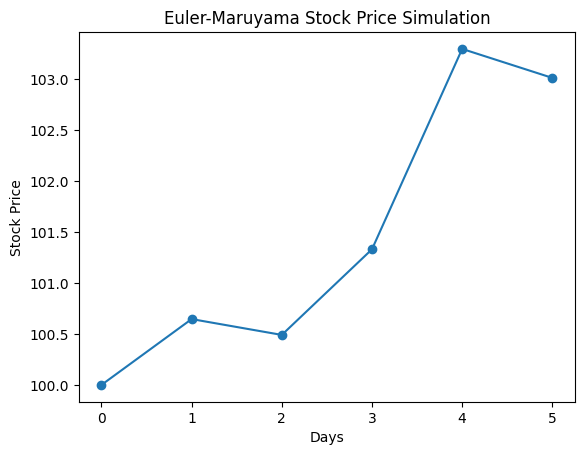

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial stock price
mu = 0.05     # Annual drift
sigma = 0.2   # Annual volatility
T = 5         # Time horizon in days
dt = 1        # Time step (1 day)
N = int(T/dt) # Number of steps
np.random.seed(42)  # Fixing seed for reproducibility

# Convert annual values to daily
mu_daily = mu / 252
sigma_daily = sigma / np.sqrt(252)

# Simulate stock price using Euler-Maruyama
S = np.zeros(N+1)
S[0] = S0
xi = np.random.normal(0, 1, N)  # Generate random noise

for n in range(N):
    S[n+1] = S[n] + dt * mu_daily * S[n] + sigma_daily * S[n] * np.sqrt(dt) * xi[n]

# Plot results
plt.plot(range(N+1), S, marker='o', linestyle='-')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Euler-Maruyama Stock Price Simulation")
plt.show()

# Heun's Method for Population Growth

### Problem: 
We are solving the population growth model where the rate of change is proportional to the population. The differential equation is given by:

$$
\frac{dP}{dt} = rP
$$

Where:
- \( P(t) \) is the population at time \( t \),
- \( r = 0.1 \) is the growth rate,
- \( P(0) = 100 \) is the initial population.

We will use **Heun's method**, a second-order Runge-Kutta method, to approximate the population from \( t_0 = 0 \) to \( t_4 = 4 \).

### Heun's Method:
The Heun's method formula is:

$$
P_{n+1} = P_n + \frac{h}{2} \left( f(t_n, P_n) + f(t_n + h, P_n + h \cdot f(t_n, P_n)) \right)
$$

Where:
- \( h \) is the time step,
- \( f(t_n, P_n) \) is the derivative at the current point.

### Step-by-Step Calculation:

We will use:
- Initial population \( P_0 = 100 \),
- Growth rate \( r = 0.1 \),
- Time step \( h = 1 \).

#### At \( t_0 = 0 \), \( P_0 = 100 \):
- Compute \( f(t_0, P_0) = 0.1 \cdot 100 = 10 \).
- Estimate \( P_1 = P_0 + h \cdot f(t_0, P_0) = 100 + 1 \cdot 10 = 110 \).
- Compute \( f(t_1, P_1) = 0.1 \cdot 110 = 11 \).
- Apply Heun's method formula:

$$
P_1 = P_0 + \frac{1}{2} \cdot \left( f(t_0, P_0) + f(t_1, P_1) \right) = 100 + \frac{1}{2} \cdot (10 + 11) = 100 + 10.5 = 110.5
$$

#### At \( t_1 = 1 \), \( P_1 = 110.5 \):
- Compute \( f(t_1, P_1) = 0.1 \cdot 110.5 = 11.05 \).
- Estimate \( P_2 = P_1 + h \cdot f(t_1, P_1) = 110.5 + 1 \cdot 11.05 = 121.55 \).
- Compute \( f(t_2, P_2) = 0.1 \cdot 121.55 = 12.155 \).
- Apply Heun's method formula:

$$
P_2 = P_1 + \frac{1}{2} \cdot \left( f(t_1, P_1) + f(t_2, P_2) \right) = 110.5 + \frac{1}{2} \cdot (11.05 + 12.155) = 110.5 + 11.1025 = 121.6025
$$

#### Repeat the same steps for \( t_2, t_3, t_4 \):

Continue applying the same process for the next time steps:

At \( t_2 = 2 \), \( P_2 = 121.6025 \):
- Compute \( f(t_2, P_2) \),
- Estimate \( P_3 \),
- Apply Heun’s method formula.

At \( t_3 = 3 \), \( P_3 \):
- Compute \( f(t_3, P_3) \),
- Estimate \( P_4 \),
- Apply Heun’s method formula.

### Conclusion:

- **Heun’s method** provides a more accurate approximation compared to the Euler method because it uses both the beginning and the end of the time step to calculate the next value, which better captures the behavior of the differential equation.


# stochastic differential equations (SDE)

differential equations in which one or more terms are influenced by random noise, typically modeled by Wiener processes or Brownian motion, making the solution a random process. They are used to describe systems that evolve over time with inherent randomness, such as financial markets or physical processes with noise.

### side note on Brownian Motion (BM) & Geometric Brownian Motion (GBM)

| Feature               | **Brownian Motion (BM)**                  | **Geometric Brownian Motion (GBM)**         |
|-----------------------|-------------------------------------------|---------------------------------------------|
| **Drift**             | No drift, pure randomness                 | Has a drift term $ \mu $, modeling growth |
| **Modeling Use**      | Random fluctuations, no specific trend    | Asset prices, stock prices, with growth and volatility |
| **Range of Values**   | Can take negative values                  | Always positive values (due to exponential model) |
| **Mathematical Form** | $ dW(t) = \mu dt + \sigma dW(t) $       | $ dS(t) = \mu S(t) dt + \sigma S(t) dW(t) $ |
| **Real-World Example**| Random walks, Brownian motion in physics | Stock price modeling, financial modeling   |


## **Real-World Example: Stock Price Modeling with Drift and Diffusion**

One of the most common real-world applications of **drift and diffusion** is in **financial markets**, where stock prices are modeled using **Geometric Brownian Motion (GBM)**:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t.
$$

where:
- $ S_t $ is the stock price at time $ t $,
- $ \mu $ is the **drift** (expected return per unit time),
- $ \sigma $ is the **diffusion** (volatility),
- $ W_t $ is a standard Brownian motion.

---

### **Example: Apple Stock Price Projection**

Suppose:
- **Current stock price**: $ S_0 = 150 $ USD,
- **Expected annual return** ($\mu$): **8%** ($ \mu = 0.08 $),
- **Annual volatility** ($\sigma$): **20%** ($ \sigma = 0.20 $),
- **Time step**: $ dt = 1 $ year.

Applying **Itô's Lemma**, we can estimate the stock price in one year:

$$
S_{t+dt} = S_t e^{\left(\mu - \frac{1}{2} \sigma^2\right)dt + \sigma W_t}.
$$

For a **single realization**, assume $ W_t = 0.5 $ (a moderate upward fluctuation):

$$
S_1 = 150 \times e^{(0.08 - 0.5 \times 0.2^2) \times 1 + 0.2 \times 0.5}.
$$

$$
S_1 = 150 \times e^{(0.08 - 0.02) + 0.1}.
$$

$$
S_1 = 150 \times e^{0.06}.
$$

$$
S_1 \approx 150 \times 1.0618 = 159.27.
$$

### **Interpretation:**
- Without randomness ($ W_t = 0 $), the stock would have grown **deterministically** to **$ S_1 \approx 158.68 $** due to the drift.
- With randomness ($ W_t = 0.5 $), the stock ended up at **$ 159.27 $**, slightly above the deterministic path.

---

### **Breaking Down Drift and Diffusion**

1. **Drift Component ($\mu S_t dt$)**:
   - **$ 150 \times 0.08 = 12 $ USD per year** → This represents the **expected** increase in price due to growth.
   
2. **Diffusion Component ($\sigma S_t dW_t$)**:
   - **$ 150 \times 0.20 \times 0.5 = 15 $ USD** → This represents the **random** movement caused by market fluctuations.

---

### **Conclusion**
- The **drift** term models **predictable growth** (e.g., a company’s long-term profitability).
- The **diffusion** term models **uncertainty** (e.g., news, market sentiment).
- Real stock prices fluctuate around the deterministic drift due to diffusion.

This is how **drift and diffusion** work together in real-world stochastic models.



### LAB

In [5]:
from abc import ABC, abstractmethod
from typing import Optional
import math

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes._axes import Axes
import torch
import torch.distributions as D
from torch.func import vmap, jacrev
from tqdm import tqdm
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
class ODE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

class SDE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

    @abstractmethod
    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
        Returns:
            - diffusion_coefficient: shape (batch_size, dim)
        """
        pass

### This can only be simulated or integrated (ODE, SDE)

In [14]:
class Simulator(ABC):
    @abstractmethod
    def step(self, xt: torch.Tensor, t: torch.Tensor, dt: torch.Tensor):
        """
        Takes one simulation step
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
            - dt: time, shape ()
        Returns:
            - nxt: state at time t + dt
        """
        pass

    @torch.no_grad()
    def simulate(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (batch_size, dim)
            - ts: timesteps, shape (nts,)
        Returns:
            - x_final: final state at time ts[-1], shape (batch_size, dim)
        """
        for t_idx in range(len(ts) - 1):
            t = ts[t_idx]
            h = ts[t_idx + 1] - ts[t_idx]
            x = self.step(x, t, h)
        return x

    @torch.no_grad()
    def simulate_with_trajectory(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (bs, dim)
            - ts: timesteps, shape (num_timesteps,)
        Returns:
            - xs: trajectory of xts over ts, shape (batch_size, num_timesteps, dim)
        """
        xs = [x.clone()]
        for t_idx in tqdm(range(len(ts) - 1)):
            t = ts[t_idx]
            h = ts[t_idx + 1] - ts[t_idx]
            x = self.step(x, t, h)
            xs.append(x.clone())
        return torch.stack(xs, dim=1)

In [17]:
class EulerSimulator(Simulator):
    def __init__(self, ode: ODE):
        self.ode = ode

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):
        return xt + h * self.ode.drift_coefficient(xt, t)

In [ ]:
class EulerMaruyamaSimulator(Simulator):
    def __init__(self, sde: SDE):
        self.sde = sde

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):

        # Get the drift coefficient (deterministic part)
        drift = self.sde.drift_coefficient(xt, t)
        
        # Get the diffusion coefficient (stochastic part)
        diffusion = self.sde.diffusion_coefficient(xt, t)

        # Generate random noise (standard normal)
        xi_t = torch.randn_like(xt)  # Random variable from N(0, 1)
        
        return xt + h * drift + diffusion * torch.sqrt(h) * xi_t